In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

from datasets import load_dataset


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test_accs_all = []
# ckpts = ["622", "1244", "1866", "2488", "3110", "3732", "4354", "4976", "5598", "6220"]
ckpts = ["311", "623", "935", "1246", "1558", "1866"]

for ckpt in ckpts:
    test_accs = (np.load("ckpts/gsm8k_orig_6epochs/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_all.append(test_accs.max(axis=-1).mean())
    # test_accs_all.append(test_accs.mean())

test_accs_all = np.array(test_accs_all)

0.1499620924943139
0.20849128127369218
0.2800606520090978
0.3065959059893859
0.32676269901440486
0.3390447308567096


In [9]:
test_accs_all_unmemorized = []
# ckpts = ["622", "1244", "1866", "2488", "3110", "3732", "4354", "4976", "5598", "6220"]
ckpts = ["281", "562", "844", "1125", "1406", "1686"]

for ckpt in ckpts:
    test_accs = (np.load("ckpts/gsm8k_orig_6epochs_unmemorized/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_all_unmemorized.append(test_accs.max(axis=-1).mean())
    # test_accs_all_unmemorized.append(test_accs.mean())

test_accs_all_unmemorized = np.array(test_accs_all_unmemorized)

0.1335860500379075
0.22501895375284306
0.2544351781652767
0.26793025018953753
0.3044730856709629
0.3155420773313116


In [10]:
test_accs_all_memorized = []
# ckpts = ["622", "1244", "1866", "2488", "3110", "3732", "4354", "4976", "5598", "6220"]
ckpts = ["281", "562", "844", "1125", "1406", "1686"]

for ckpt in ckpts:
    test_accs = (np.load("ckpts/gsm8k_orig_6epochs_memorized/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_all_memorized.append(test_accs.max(axis=-1).mean())
    # test_accs_all_memorized.append(test_accs.mean())

test_accs_all_memorized = np.array(test_accs_all_memorized)

0.14420015163002275
0.20576194086429114
0.24594389689158452
0.26793025018953753
0.3023502653525398
0.30432145564821833


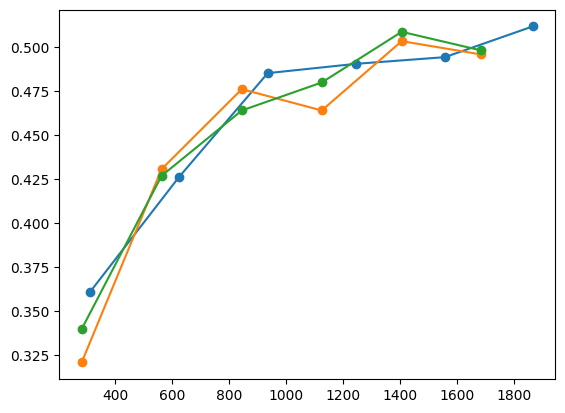

In [11]:
plt.plot([int(_) for _ in ["311", "623", "935", "1246", "1558", "1866"]], test_accs_all, "o-")
plt.plot([int(_) for _ in ["281", "562", "844", "1125", "1406", "1686"]], test_accs_all_unmemorized, "o-")
plt.plot([int(_) for _ in ["281", "562", "844", "1125", "1406", "1686"]], test_accs_all_memorized, "o-")
plt.savefig("delete.png")

In [3]:
dataset = load_dataset("gsm8k", "main")
train_questions = np.array(dataset["train"]["question"])
train_answers = np.array(dataset["train"]['answer'])

In [25]:
subsample_idxs = np.load("ckpts/gsm8k_orig_6epochs_memorized/subsample_idxs.npy")

In [26]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

# ckpts = ["3332", "6664", "9996", "13328", "16660"]
ckpts = ["281", "562", "844", "1125", "1406", "1686"]

for ckpt in ckpts:
    train_correct = (np.load("ckpts/gsm8k_orig_6epochs_memorized/checkpoint-"+ckpt+ "/train_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/gsm8k_orig_6epochs_memorized/checkpoint-"+ckpt+ "/train_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(subsample_idxs)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[subsample_idxs[input_idx]][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)
    
num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

In [32]:
len(subsample_idxs)

6748

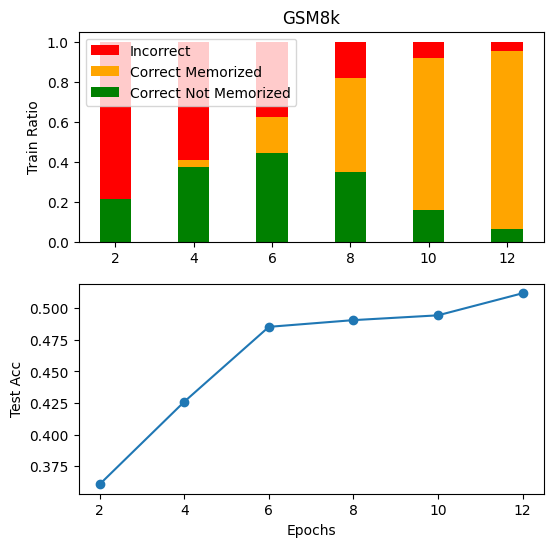

In [27]:
# make 2 subplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.bar([2*i for i in range(1, 7)], [1 for i in range(6)], color = "red", label = "Incorrect")
ax1.bar([2*i for i in range(1, 7)], [1-(num_incorrect_all/5).mean(axis=1)[i] for i in range(6)], color = "orange", label = "Correct Memorized")
ax1.bar([2*i for i in range(1, 7)], [1-(num_incorrect_all/5).mean(axis=1)[i]-(num_memorized_all/5).mean(axis=1)[i] for i in range(6)], color = "green", label = "Correct Not Memorized")
ax1.set_xticks([2*i for i in range(1, 7)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("GSM8k")
ax1.legend()

ax2.plot([2*i for i in range(1, 7)], test_accs_all, "o-")
ax2.set_xticks([2*i for i in range(1, 7)])
ax2.set_ylabel("Test Acc")
ax2.set_xlabel("Epochs")
plt.savefig("delete.png")

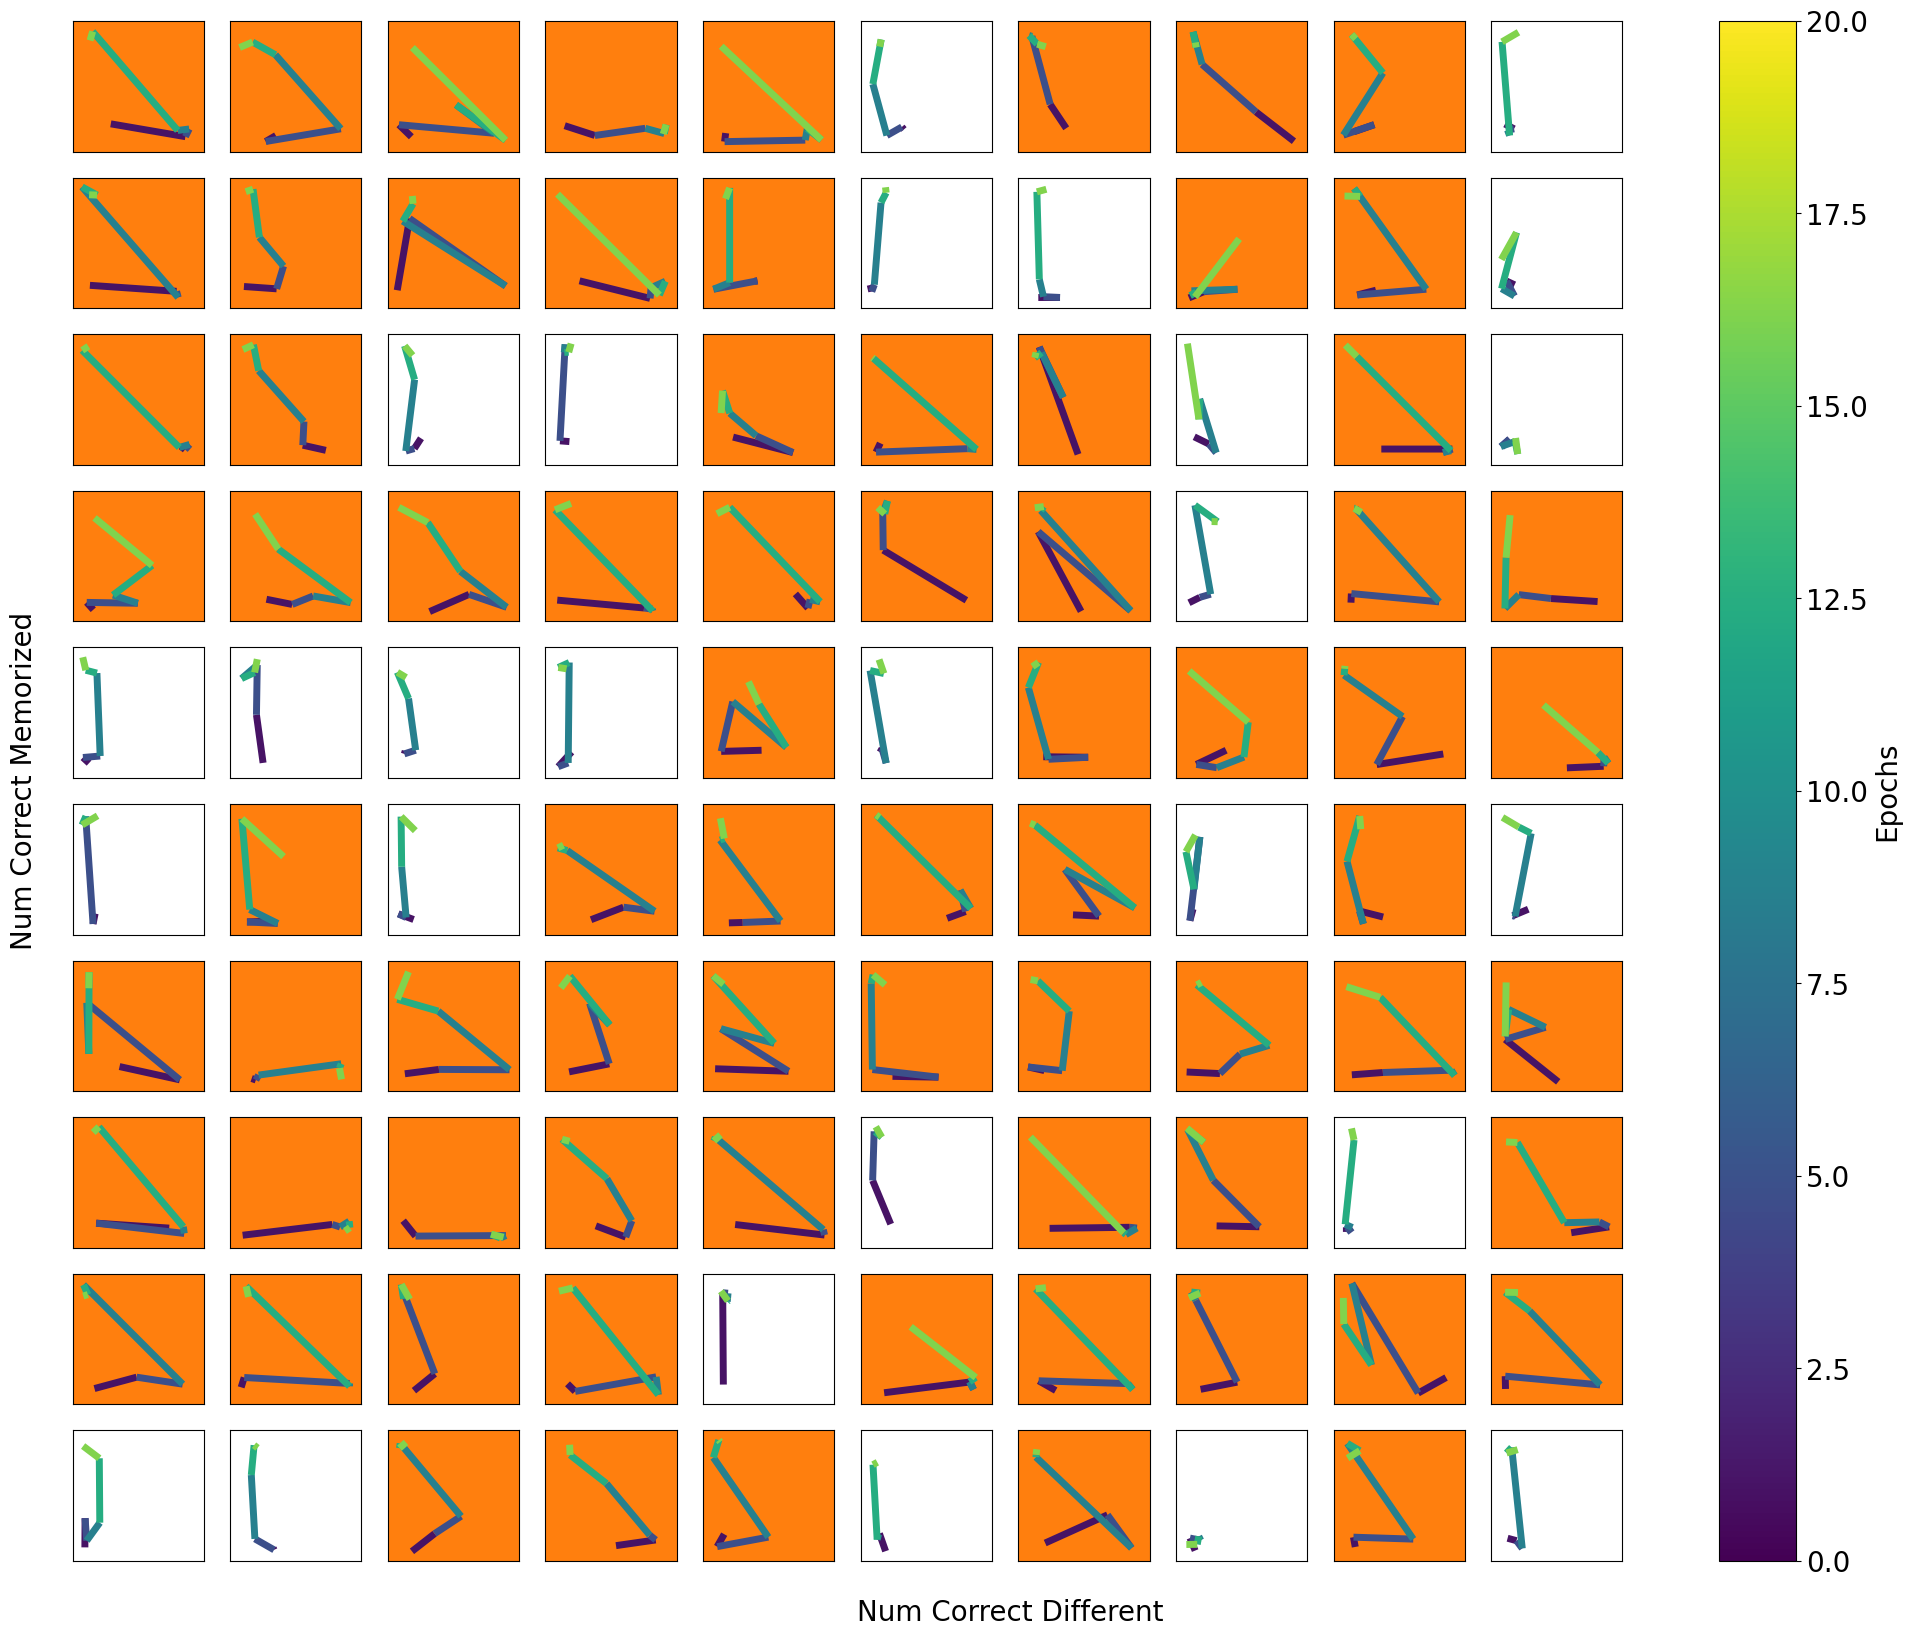

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, 6)




for i in range(100):
    x = num_correct_different_all[:, i]+np.random.uniform(-0.5, 0.5, 6)
    y = num_memorized_all[:, i]+np.random.uniform(-0.5, 0.5, 6)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('C1')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")

In [21]:
len(num_correct_different_all[0])

6748

In [22]:
len(train_questions)

7473

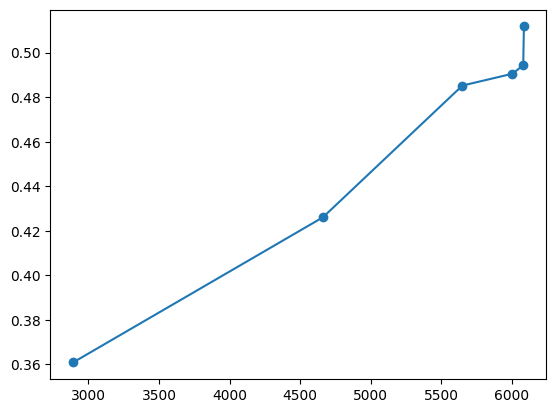

In [34]:
cummulative_num_correct_different = []
for i in range(6):
    # cummulative_num_correct_different.append((num_correct_different_all[:i+1,].max(axis=0)>0).sum())
    # cummulative_num_correct_different.append((num_correct_different_all[:i+1,]).max(axis=0).mean())
    cummulative_num_correct_different.append(num_correct_different_all[:i+1,].sum())


plt.plot(cummulative_num_correct_different, test_accs_all, "o-")
plt.savefig("delete.png")

In [24]:
cummulative_num_correct_different

[2775, 4570, 5432, 5701, 5755, 5764]

In [30]:
cummulative_num_correct_different

[2891, 4662, 5650, 6004, 6081, 6086]

In [31]:
num_correct_different_all.shape

(6, 6748)